In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load dataset
df = pd.read_csv(r"C:\Users\revad\OneDrive\Desktop\IBM-skillbuid AICTE Internship\adult 3.csv")

In [8]:
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [9]:
# Create salary column
df['salary'] = df['income'].map({'<=50K': 35000, '>50K': 70000})
df.drop(columns=['income'], inplace=True)

# Replace '?' with NaN
df.replace(' ?', np.nan, inplace=True)

# Drop rows with missing values (simplification)
df.dropna(inplace=True)

In [10]:
# Define numerical and categorical features
num_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

X = df[num_features + cat_features]
y = df['salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])

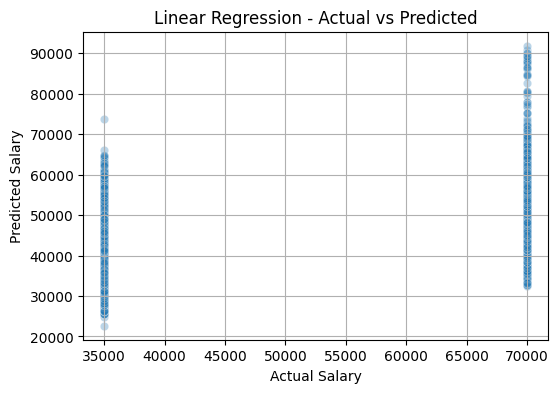

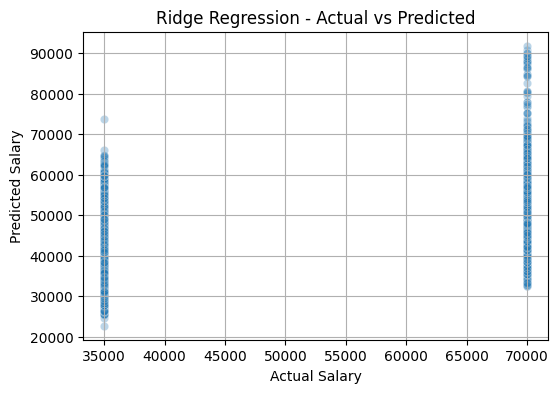

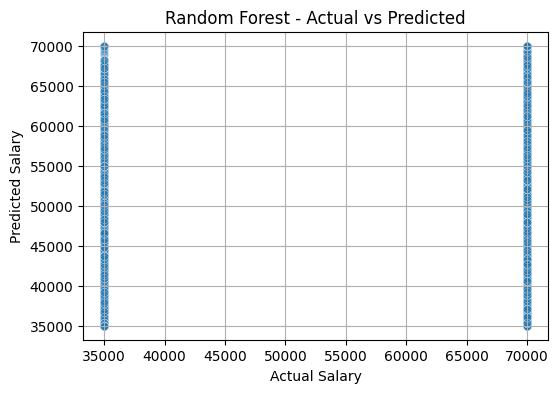

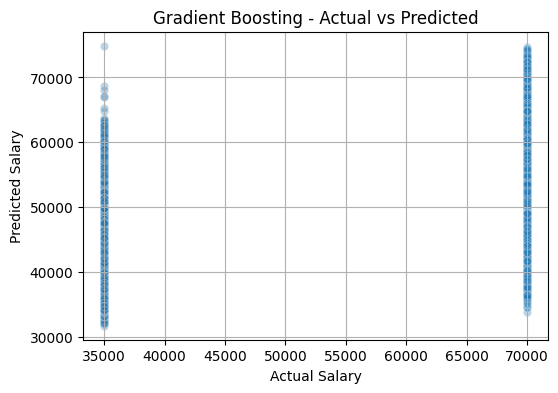

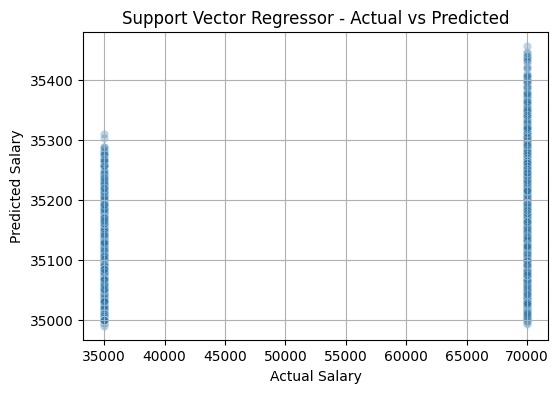

In [12]:
# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# Training, evaluating, and visualizing
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results[name] = {
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    }
     
        # Scatterplot of predictions
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=preds, alpha=0.3)
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

In [13]:
# Display performance summary
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                                   MSE      RMSE  R2 Score
Linear Regression         1.387992e+08  11781.31    0.3686
Ridge Regression          1.387937e+08  11781.08    0.3687
Random Forest             1.189341e+08  10905.69    0.4590
Gradient Boosting         1.117427e+08  10570.84    0.4917
Support Vector Regressor  2.850581e+08  16883.66   -0.2966
